# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [ ]:
test = pd.read_csv('/content/SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# **Exploratory Data Analysis**

In [ ]:
test.shape

(15060, 14)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [ ]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [ ]:
for i in test.columns:
  print("\n", i, "\n", test[i].unique())


 age 
 [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]

 workclass 
 [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']

 education 
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']

 educationno 
 [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]

 maritalstatus 
 [' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']

 occupation 
 [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-

In [ ]:
test.drop('native',axis = 1, inplace = True)
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


# **Correlation Matrix**

In [ ]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


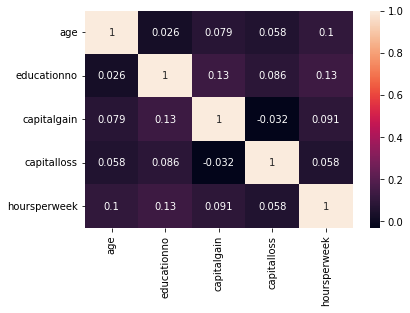

In [ ]:
sns.heatmap(test.corr(), annot = True)

In [ ]:
# Loop for getting categorical data
for col in test.columns:
  if test[col].dtype == 'object':
    print(col)

workclass
education
maritalstatus
occupation
relationship
race
sex
Salary


In [ ]:
# Loop for getting Continuous data
for col in test.columns:
  if test[col].dtype != 'object':
    print(col)

age
educationno
capitalgain
capitalloss
hoursperweek


In [ ]:
Continuous = ['age','educationno','capitalgain','capitalloss','hoursperweek']
Category = ['workclass', 'education', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'Salary']

# **Distribution of Continuous**

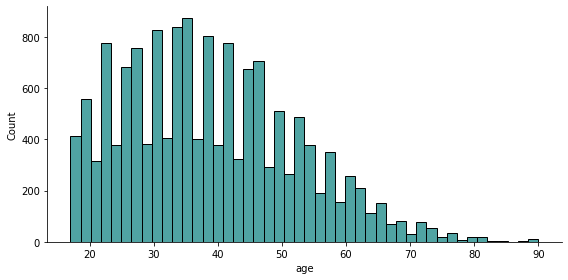

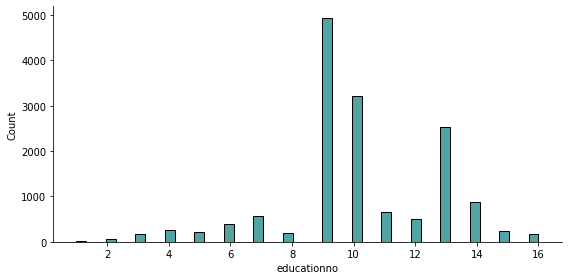

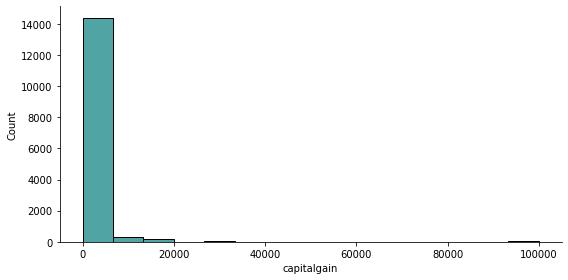

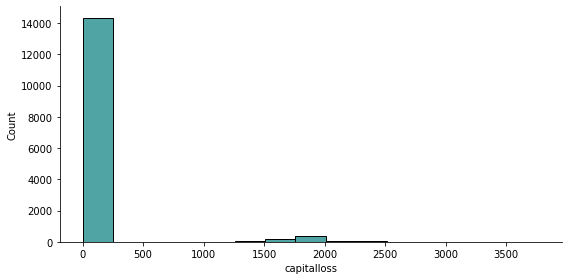

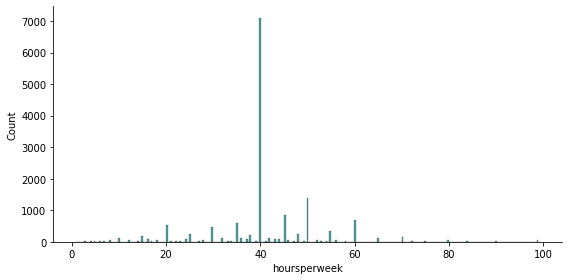

In [ ]:
for feature in Continuous:
  sns.displot(data=test, x=feature, height=4, aspect=2, color = '#158685')
  plt.show()

# **Distribution of Category**

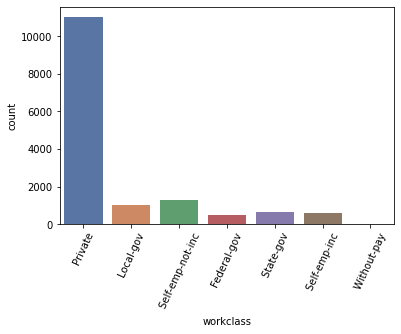

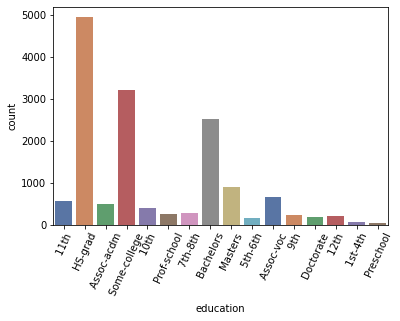

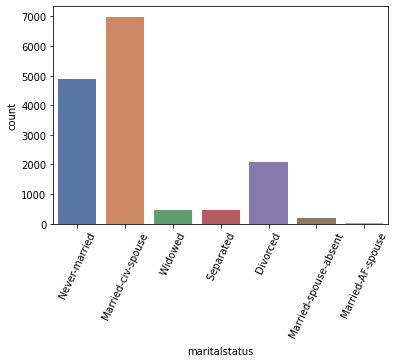

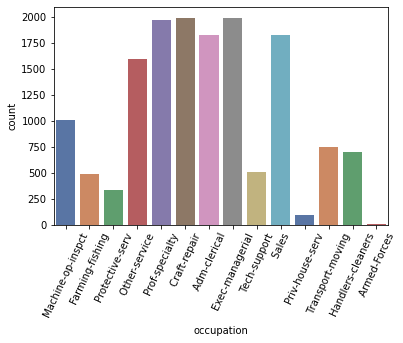

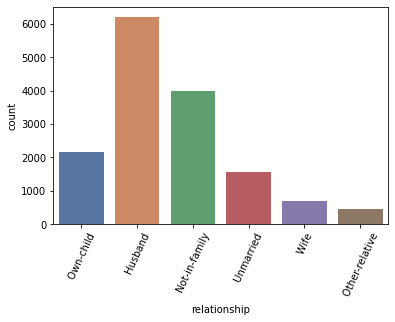

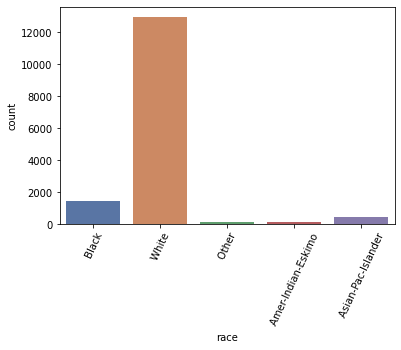

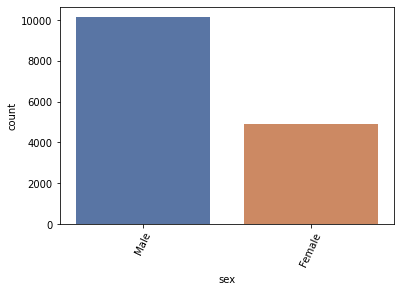

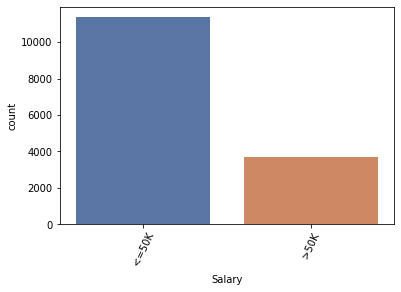

In [ ]:
for feature in Category:
  sns.countplot(data = test, x=feature, palette = 'deep')
  plt.xticks(rotation=65)
  plt.show()

# **Box Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


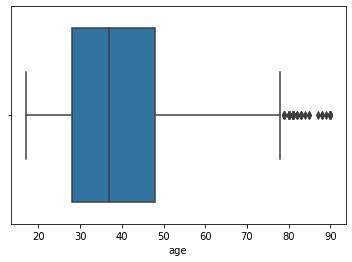

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


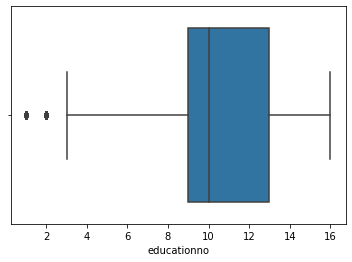

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


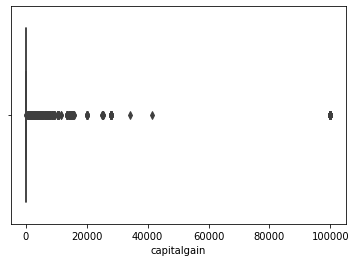

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


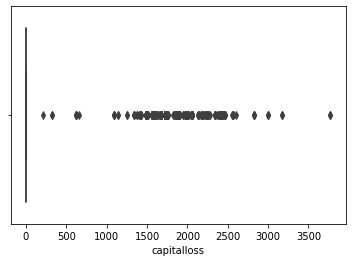

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


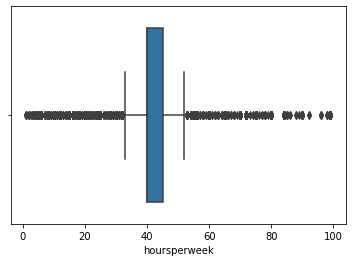

In [ ]:
for feature in Continuous:
  sns.boxplot(test[feature])
  plt.show()

# **Distplot**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


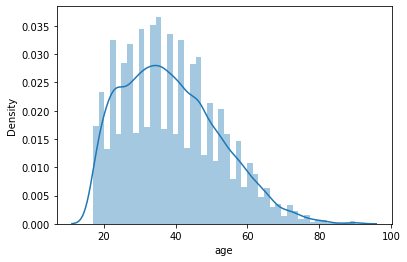

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


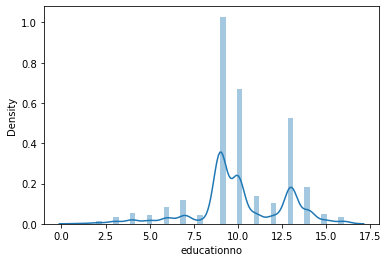

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


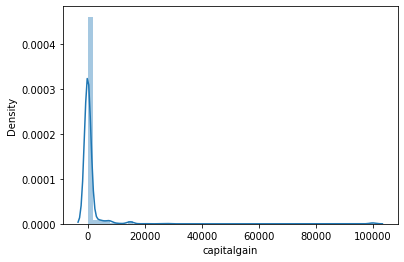

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


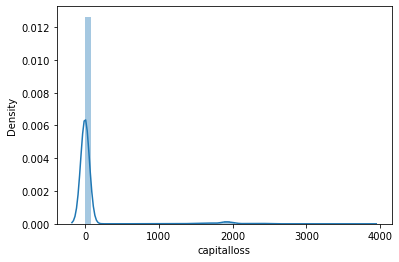

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


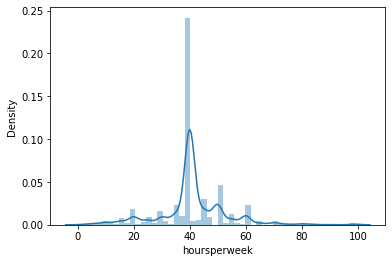

In [ ]:
for feature in Continuous:
  sns.distplot(test[feature])
  plt.show()

# **Violin Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


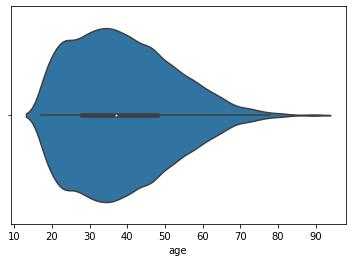

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


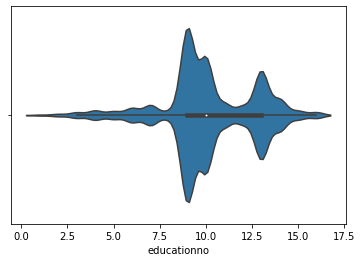

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


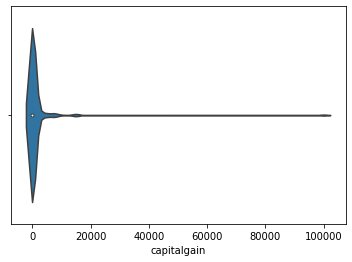

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


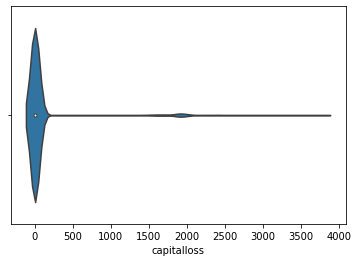

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


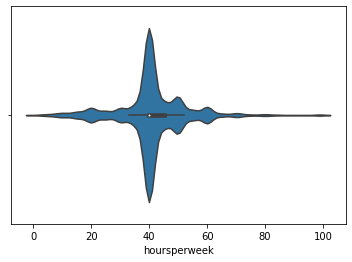

In [ ]:
for feature in Continuous:
  sns.violinplot(test[feature])
  plt.show()

# **Encoding the Categorical Variable**

In [ ]:
# Loop for Label Encoding
for col in Category:
  le = LabelEncoder()
  le.fit(test[col])
  test[col] = le.transform(test[col])

In [ ]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


In [ ]:
test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

We can see that salary <=50K has more observations and >50K has less observations.

Here the data is imbalanced.

# **Scaling the Data**

In [ ]:
scaler = MinMaxScaler()
model = scaler.fit(test)
scaled_data = model.transform(test)

In [ ]:
scaled_data

array([[0.10958904, 0.33333333, 0.06666667, ..., 0.        , 0.39795918,
        0.        ],
       [0.28767123, 0.33333333, 0.73333333, ..., 0.        , 0.5       ,
        0.        ],
       [0.15068493, 0.16666667, 0.46666667, ..., 0.        , 0.39795918,
        1.        ],
       ...,
       [0.28767123, 0.33333333, 0.6       , ..., 0.        , 0.5       ,
        0.        ],
       [0.36986301, 0.33333333, 0.6       , ..., 0.        , 0.39795918,
        0.        ],
       [0.24657534, 0.5       , 0.6       , ..., 0.        , 0.60204082,
        1.        ]])

In [ ]:
test1 = pd.DataFrame(scaled_data, columns = test.columns)
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.0


# **Defining Independent and Dependent Variable**

In [ ]:
X = test1.drop('Salary',axis = 1)
Y = test1.iloc[:,-1]

In [ ]:
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918


In [ ]:
Y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: Salary, dtype: float64

In [ ]:
X.shape,Y.shape

((15060, 12), (15060,))

# **Balancing the data by Smote**

In [ ]:
Y.value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy = 'minority')

oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)

Y.value_counts()

0.0    11360
1.0    11360
Name: Salary, dtype: int64

Now, here the data is balanced and we can move further.

# **Splitting the data into Training and Testing dataset**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
17303,0.363527,0.333333,0.600000,0.800000,0.333333,0.692308,0.000000,1.00,1.0,0.0,0.000000,0.504571
19305,0.317440,0.666667,0.600000,0.800000,0.333333,0.230769,0.000000,1.00,1.0,0.0,0.000000,0.480049
8113,0.438356,0.333333,1.000000,0.600000,0.333333,0.000000,0.000000,0.25,1.0,0.0,0.000000,0.397959
6877,0.095890,0.666667,0.600000,0.800000,0.666667,0.230769,0.600000,1.00,1.0,0.0,0.000000,0.397959
5435,0.260274,0.333333,1.000000,0.600000,0.666667,0.000000,0.600000,1.00,0.0,0.0,0.000000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0.465753,0.333333,0.800000,0.866667,0.333333,0.230769,0.000000,1.00,1.0,0.0,0.000000,0.704082
12068,0.547945,0.333333,0.733333,0.533333,0.333333,0.153846,0.000000,1.00,1.0,0.0,0.461538,0.397959
7691,0.205479,0.666667,0.066667,0.400000,0.333333,0.307692,0.000000,1.00,1.0,0.0,0.000000,0.806122
21086,0.635019,0.705801,0.497974,0.748987,1.000000,0.746494,0.340883,1.00,0.0,0.0,0.000000,0.476040


# **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB

# Multinomial Naive Bayes

#Model Train
classifier_mb = MB()

#Model Test 

# Model Accuracy on train set
train_pred_m = classifier_mb.fit(X_train,y_train).predict(X_train)
accuracy_train_m = np.mean(train_pred_m == y_train)

# Model Accuracy on test set

test_pred_m = classifier_mb.fit(X_train,y_train).predict(X_test)
accuracy_test_m = np.mean(test_pred_m == y_test)

In [ ]:
accuracy_train_m

0.7382419517102615

In [ ]:
accuracy_test_m

0.7293133802816901

In [ ]:
test_pred_m

array([1., 1., 1., ..., 1., 0., 1.])

# **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB as GB

# Gaussian Naive Bayes

#Model Train
classifier_gb = GB()

#Model Test 

# Model Accuracy on train set

train_pred_g = classifier_gb.fit(X_train,y_train).predict(X_train)
accuracy_train_g = np.mean(train_pred_g == y_train)

# Model Accuracy on test set
test_pred_g = classifier_gb.fit(X_train,y_train).predict(X_test)
accuracy_test_g = np.mean(test_pred_g == y_test) 

In [ ]:
accuracy_train_g

0.7074949698189135

In [ ]:
accuracy_test_g

0.7098004694835681

In [ ]:
test_pred_g

array([1., 1., 0., ..., 0., 0., 1.])

# **Confusion Matrix**

In [ ]:
confusion_matrix = confusion_matrix(y_test,test_pred_m)

In [ ]:
confusion_matrix

array([[2182, 1226],
       [ 619, 2789]])

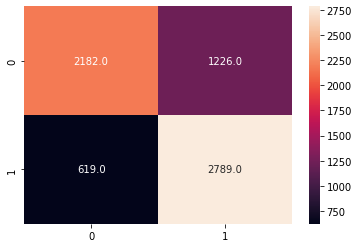

In [ ]:
sns.heatmap(confusion_matrix,annot=True, fmt=".1f")

# **Accuracy Score**

In [ ]:
acc=(accuracy_score(y_test,test_pred_m))
acc

0.7293133802816901

# **Classification Report**

In [ ]:
print(classification_report(y_test,test_pred_m))

              precision    recall  f1-score   support

         0.0       0.78      0.64      0.70      3408
         1.0       0.69      0.82      0.75      3408

    accuracy                           0.73      6816
   macro avg       0.74      0.73      0.73      6816
weighted avg       0.74      0.73      0.73      6816



# **Accuracy Score**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_pred_m)



 ROC AUC score: 0.7293133802816901 




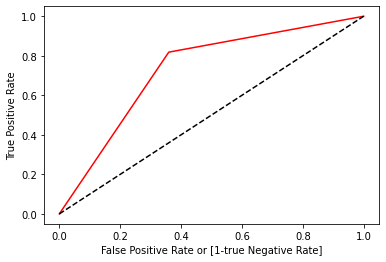

In [ ]:
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1-true Negative Rate]')
plt.ylabel('True Positive Rate')
print(f'\n\n ROC AUC score: {acc} \n\n')